# Mark Ilodigwe Exam 1
- 3/6/24





In [1]:
!pip install seaborn matplotlib pandas numpy scikit-learn


In [2]:
#Dependencies I imported 
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
from pylab import *

In [3]:
#Read in the data
alz_data = pd.read_csv("DARWIN.csv", index_col=0)
alz_data.head(50)



#air_time_16 to total_air_time_16


alz_data.columns
alz_data.dtypes

air_time1             int64
disp_index1         float64
gmrt_in_air1        float64
gmrt_on_paper1      float64
max_x_extension1      int64
                     ...   
paper_time25          int64
pressure_mean25     float64
pressure_var25      float64
total_time25          int64
class                object
Length: 451, dtype: object

In [4]:
#Creating the alz dataset 
alz = alz_data.loc[:, 'air_time16':'total_time16']


alz['class'] = alz_data['class']  




alz
alz.columns


Index(['air_time16', 'disp_index16', 'gmrt_in_air16', 'gmrt_on_paper16',
       'max_x_extension16', 'max_y_extension16', 'mean_acc_in_air16',
       'mean_acc_on_paper16', 'mean_gmrt16', 'mean_jerk_in_air16',
       'mean_jerk_on_paper16', 'mean_speed_in_air16', 'mean_speed_on_paper16',
       'num_of_pendown16', 'paper_time16', 'pressure_mean16', 'pressure_var16',
       'total_time16', 'class'],
      dtype='object')

In [5]:
#fig=sns.pairplot(alz)


<Axes: xlabel='class', ylabel='count'>

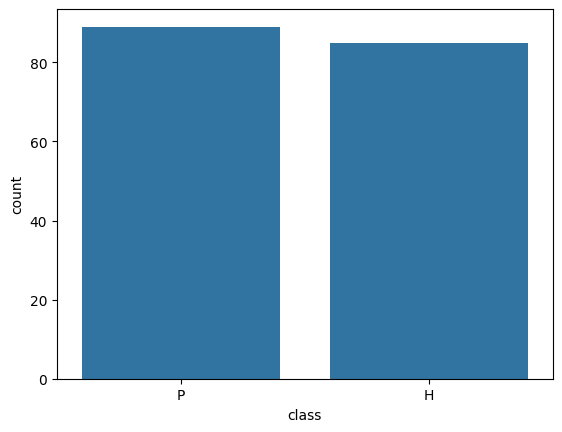

In [6]:
#Creating a countplot to 
sns.countplot(x='class',data=alz_data)


In [7]:
#Dependencies 

from sklearn.linear_model import LogisticRegression
from sklearn import feature_extraction
from sklearn.model_selection import train_test_split





from sklearn.preprocessing import MinMaxScaler

In [8]:
#Creating X and y 
X=alz.drop(['class'],axis=1)
y=alz['class']





#Creating my train and test split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,
random_state=14)

In [9]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)



scaler = MinMaxScaler()

X_train_reg=scaler.fit(X_train)

X_train_norm=scaler.transform(X_train)

X_test_transform=scaler.transform(X_test)

In [10]:
# Training
lgR = LogisticRegression(C=0.51,max_iter=500)
lgR
lgR.fit(X_train, y_train)
# Predictions
predictions = lgR.predict(X_test)

/Users/markilodigwe/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
#Dependencies 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import statsmodels.api as sm


In [12]:
#Classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           H       0.60      0.71      0.65        21
           P       0.68      0.57      0.62        23

    accuracy                           0.64        44
   macro avg       0.64      0.64      0.64        44
weighted avg       0.64      0.64      0.63        44



## Decision Trees

In [18]:
from sklearn.tree import DecisionTreeClassifier

## Gini Decision Tree

In [14]:
#Creating a decisio tree and fitting the model with parameters listed in table 4

clf = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=3, min_samples_leaf=14, max_leaf_nodes=10) 

clf.fit(X_train, y_train)



from sklearn.metrics import classification_report
predictions2= clf.predict(X_test)
print(classification_report(y_test, predictions2))


              precision    recall  f1-score   support

           H       0.62      0.71      0.67        21
           P       0.70      0.61      0.65        23

    accuracy                           0.66        44
   macro avg       0.66      0.66      0.66        44
weighted avg       0.66      0.66      0.66        44



## Entropy Decision Tree

In [15]:
#Creating entropy decision tree classifier 
clf2 = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=3, min_samples_leaf=14, max_leaf_nodes=10) 

clf2.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=10,
                       min_samples_leaf=14, min_samples_split=3)

In [16]:
#Predicting with my model 
from sklearn.metrics import classification_report
predictions1 = clf2.predict(X_test)
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           H       0.67      0.86      0.75        21
           P       0.82      0.61      0.70        23

    accuracy                           0.73        44
   macro avg       0.75      0.73      0.72        44
weighted avg       0.75      0.73      0.72        44



In [24]:
#Creating a dataframe with my column information and interpretation
my_info={'Model Name':['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy'],'F1 Score':['0.62','0.65','0.70'],
         'Interpretation':["Both moderate precision & moderate recall","Both moderate precision & moderate recall","The highest precision & recall"]}

table=pd.DataFrame(my_info)

table

#Close to 1, ratio of precision to recall 

,Model Name,F1 Score,Interpretation
0,Logistic Regression,0.62,Both moderate precision & moderate recall
1,Decision Tree Gini,0.65,Both moderate precision & moderate recall
2,Decision Tree Entropy,0.70,The highest precision & recall


##  3&4 

### 3. Present a table of an appropriate metric that compares the performance of the two models and interpret them. Your table should be only three columns (thus algorithm, Metric and interpretation).
+ Logistic Regression
  -  A F1 score of 0.62, as it is a measure of model accuracy in binary classification, is far from the desirable value of 1. In this case, patient and healthy can be classifed in the same way, similar that of 0 and 1s, but here only 62% of the positive cases or those that are actually patients were correclty labeled. This is not the best model
 
+ Decision Tree Gini
  - A F1 score of 0.65 would mean that 65% of the positive cases or those that are actually patients were correclty labeled.
 
+ Decision Tree Entropy

  - A F1 score of 0.70  has both high precision (few false positives) and high recall (few false negatives). A desired F1 score is that which is close to one which would mean that 70% of the positive cases or those that are actually patients were correclty labeled.
 
### 4. Which of your two models is performing better?


+ Out of all of the models I created, I believe the decision tree performs the best. Both F1 scores for entropy and gini index are higher than that of my logistic regression model. More specificially, based on the parameter range of value that I chose, I would pay attention to entropy, as it is able to classify 70% of positive cases, rather than gini with 60%.

# 5. Identify the mean accuracy of the two models from Table 7 of the paper and then compare them with your models.





+ Logistic Regression Accuracy (from table)
  - 74.00 (±6.81)%

+ Decision Tree Accuracy (from table) 
  - 74.86 (±7.22)%


___________________________________________________________


+ Logistic Accuracy from my Model
  - 0.64 %



+ Decision Tree Accuracy from my Model 
  - Gini
    + 0.66 %
  
  - Entropy
    + 0.73 %
   


Based on these values, it appears that the logisitc regression accuracy I caluclated with much worse than that of the mean accuracy from table 7. It was outside of the (+/-)6.81 interval thus making it a nonreliable value.


In addtion, the decision tree accuracy I calculated with 0.66 for the Gini and 0.73 for entropy. When looking at them individually and comparing them to the value in Table 7, Entropy was within the range of (+/-) 7.22 while Gini was not. However, when an average of the two metrics was taken into consideration, I found the average of the two value to be 0.695. This value is still within the Decision Tree accruacy threshold indicated by table 7 thus meaning that I was successful in my exploration for this assignment. 

  
